# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | qarauyl
Processing Record 4 of Set 1 | tommot
Processing Record 5 of Set 1 | chapaev
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | maturin
Processing Record 8 of Set 1 | 'izbat al burj
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | harstad
Processing Record 12 of Set 1 | acapulco de juarez
Processing Record 13 of Set 1 | santyoku
Processing Record 14 of Set 1 | callao
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | bokhan
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | san mariano
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | nahan
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | loralai
Proce

Processing Record 43 of Set 4 | al jaradiyah
Processing Record 44 of Set 4 | ouellah
City not found. Skipping...
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | fomento
Processing Record 47 of Set 4 | conceicao da barra
Processing Record 48 of Set 4 | ust'-ilimsk
Processing Record 49 of Set 4 | calama
Processing Record 0 of Set 5 | aykhal
Processing Record 1 of Set 5 | broken hill
Processing Record 2 of Set 5 | margate
Processing Record 3 of Set 5 | along
Processing Record 4 of Set 5 | mejit
Processing Record 5 of Set 5 | oranjemund
Processing Record 6 of Set 5 | velikiy novgorod
Processing Record 7 of Set 5 | banda aceh
Processing Record 8 of Set 5 | taoudenni
Processing Record 9 of Set 5 | kingston
Processing Record 10 of Set 5 | udachny
Processing Record 11 of Set 5 | port isabel
Processing Record 12 of Set 5 | rumonge
Processing Record 13 of Set 5 | happy valley-goose bay
Processing Record 14 of Set 5 | olonkinbyen
Processing Record 15 of Set 5 | sonoit

Processing Record 34 of Set 8 | leua
Processing Record 35 of Set 8 | sydney
Processing Record 36 of Set 8 | tazacorte
Processing Record 37 of Set 8 | riachao
Processing Record 38 of Set 8 | wallenhorst
Processing Record 39 of Set 8 | sonsorol village
City not found. Skipping...
Processing Record 40 of Set 8 | cooma
Processing Record 41 of Set 8 | hornell
Processing Record 42 of Set 8 | marathon
Processing Record 43 of Set 8 | barra do garcas
Processing Record 44 of Set 8 | punta del este
Processing Record 45 of Set 8 | chake chake
Processing Record 46 of Set 8 | qobu
Processing Record 47 of Set 8 | fortuna
Processing Record 48 of Set 8 | thyolo
Processing Record 49 of Set 8 | sao tome
Processing Record 0 of Set 9 | preston
Processing Record 1 of Set 9 | nova sintra
Processing Record 2 of Set 9 | lensk
Processing Record 3 of Set 9 | nelson
Processing Record 4 of Set 9 | comodoro rivadavia
Processing Record 5 of Set 9 | chikhli
Processing Record 6 of Set 9 | abepura
Processing Record 7 o

Processing Record 22 of Set 12 | aroma
Processing Record 23 of Set 12 | san antonio de pale
Processing Record 24 of Set 12 | las heras
Processing Record 25 of Set 12 | chicoana
Processing Record 26 of Set 12 | arima
Processing Record 27 of Set 12 | arkhangel'sk
Processing Record 28 of Set 12 | vilyuchinsk
Processing Record 29 of Set 12 | cherdyn'
Processing Record 30 of Set 12 | cat ba
City not found. Skipping...
Processing Record 31 of Set 12 | lethem
Processing Record 32 of Set 12 | prymors'k
Processing Record 33 of Set 12 | aomori
Processing Record 34 of Set 12 | nahiyat ash shinafiyah
Processing Record 35 of Set 12 | bodo
Processing Record 36 of Set 12 | oroqen zizhiqi
Processing Record 37 of Set 12 | beyneu
Processing Record 38 of Set 12 | gao
Processing Record 39 of Set 12 | phan thiet
Processing Record 40 of Set 12 | sierra grande
Processing Record 41 of Set 12 | hillsborough
Processing Record 42 of Set 12 | pemangkat
Processing Record 43 of Set 12 | andergrove
Processing Record

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-6.24,78,39,5.30,GS,1718229049
1,hermanus,-34.4187,19.2345,14.19,84,0,0.94,ZA,1718229049
2,qarauyl,48.9451,79.2550,13.34,81,80,0.09,KZ,1718229049
3,tommot,58.9564,126.2925,14.49,78,97,0.26,RU,1718229049
4,chapaev,50.2000,51.1667,23.26,44,100,4.00,KZ,1718229049


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("./output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("./output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-6.24,78,39,5.30,GS,1718229049
1,hermanus,-34.4187,19.2345,14.19,84,0,0.94,ZA,1718229049
2,qarauyl,48.9451,79.2550,13.34,81,80,0.09,KZ,1718229049
3,tommot,58.9564,126.2925,14.49,78,97,0.26,RU,1718229049
4,chapaev,50.2000,51.1667,23.26,44,100,4.00,KZ,1718229049


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

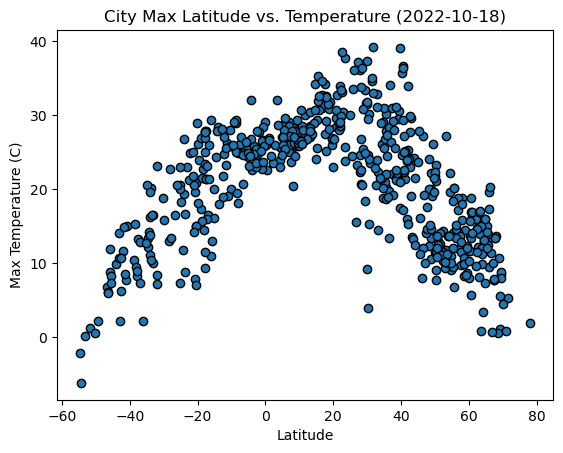

In [12]:
# Build scatter plot for latitude vs. temperature
# Need to add metrics to the url code above, otherwise the data will show in F not C

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor = "black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature (2022-10-18)')

# Save the figure

plt.savefig("./output_data/Fig1.png")

# Show plot

plt.show()

#### Latitude Vs. Humidity

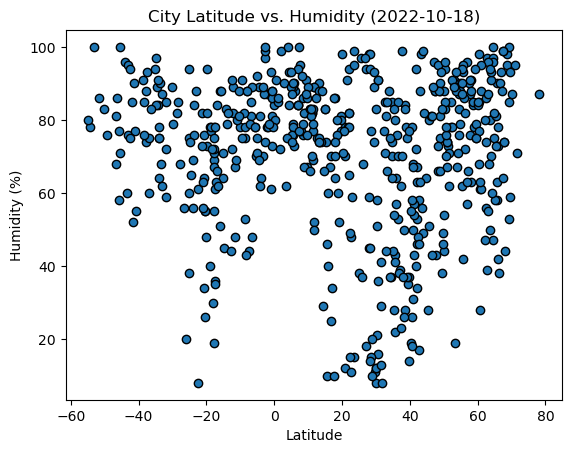

In [13]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor = "black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')

# Save the figure

plt.savefig("./output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

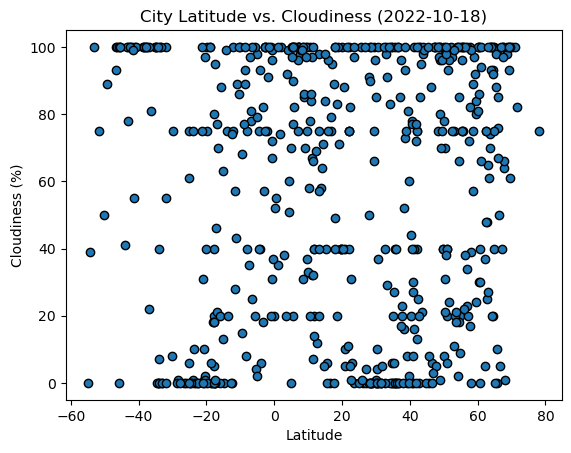

In [14]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor = "black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')

# Save the figure
plt.savefig("./output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

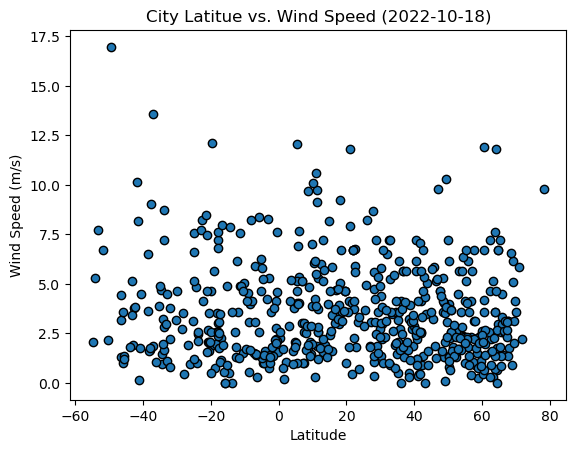

In [15]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor = "black")

# Incorporate the other graph properties

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitue vs. Wind Speed (2022-10-18)')

# Save the figure
plt.savefig("./output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

def linear_regression_model(x_value, y_value, title, text_coord):
    
    # Create the linear regression plotting and equation
    
    # Make the equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    # y = mx + b
    regress_values = x_value * slope + intercept
    line_eq = "y =" + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data

northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,qarauyl,48.9451,79.2550,13.34,81,80,0.09,KZ,1718229049
3,tommot,58.9564,126.2925,14.49,78,97,0.26,RU,1718229049
4,chapaev,50.2000,51.1667,23.26,44,100,4.00,KZ,1718229049
5,bilibino,68.0546,166.4372,13.66,44,1,1.77,RU,1718229049
6,maturin,9.7500,-63.1767,27.70,67,100,3.91,VE,1718229045


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemisphere_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data

southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-6.24,78,39,5.30,GS,1718229049
1,hermanus,-34.4187,19.2345,14.19,84,0,0.94,ZA,1718229049
8,port elizabeth,-33.9180,25.5701,16.16,75,0,8.75,ZA,1718229049
12,callao,-12.0667,-77.1500,24.68,82,100,3.60,PE,1718229049
15,blackmans bay,-43.0167,147.3167,2.07,76,78,1.91,AU,1718229049


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5592874426886183


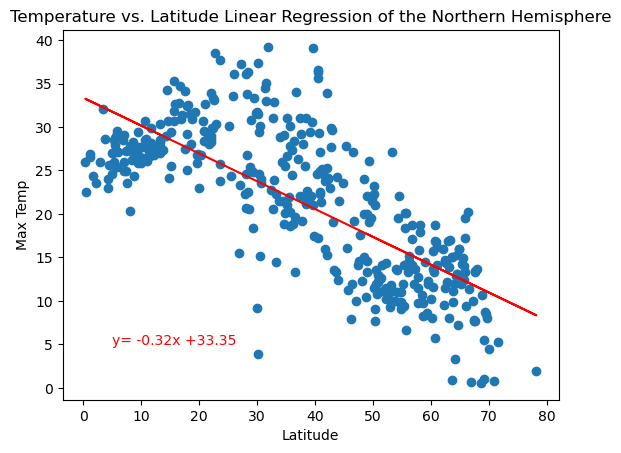

In [19]:
# Linear regression on Northern Hemisphere

x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (5, 5), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression of the Northern Hemisphere')

print(f'The r-value is: {rvalue**2}')

The r-value is: 0.6708801817573584


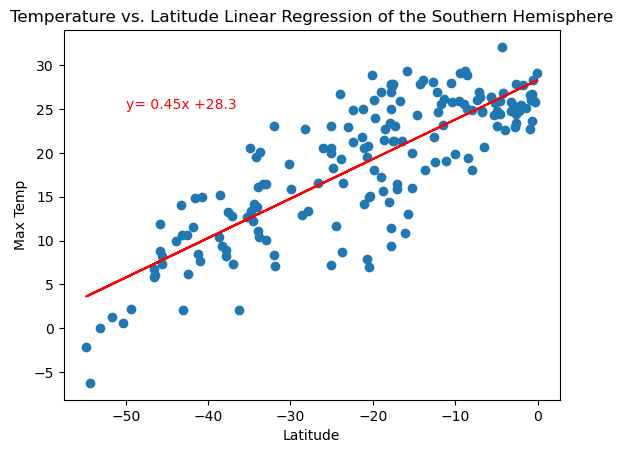

In [20]:
# Linear regression on Southern Hemisphere

x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (-50, 25), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Temperature vs. Latitude Linear Regression of the Southern Hemisphere')

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:** 
Both of the linear regressions show the relationship between the distance from the equator and what the max temperature would be of a region when going further from the equator.  The linear regression comparing this realtionship in the northern hemisphere has the latitude increasing, meaning the max temperature is taken from regions north of the equator, whereas the regression of the souther hemisphere has the latitude decreasing.  The decrease in latitude for the southern hemisphere regression indicates that the max temperature has been illustrated from points going towards the equator starting at the south.

Even though the linear regression from the norther hemisphere data is showing a negative regression and the southern hemisphere data is showing a positive regression, this does not mean that the relationships are opposite of each other.  Both regressions show that the more distance from the equator, the lower the max temperature of a given region would be.  Based on the linear regression shown by the northern hemisphere data, the temperature decreases the more north the latitude is.  This shows that a negative relationship between the latitude as it changes due north and the max temperature.  Based on the linear regression shown by the southern hemisphere data, the temperature increases as the latitude changes due towards the equator.  If the x-values were rotated, the linear regression would be negative, indicated the same as the regression of the northern hemisphere.  Even though the linear regression illustrated for the southern hemisphere data is positive, this does not mean the actual results show a positive relationship between the distance from the equator and the temperature.  Both of the linear regressions show that the further the distance from the equator, latitude of 0, the colder the temperature is.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0018233247073084404


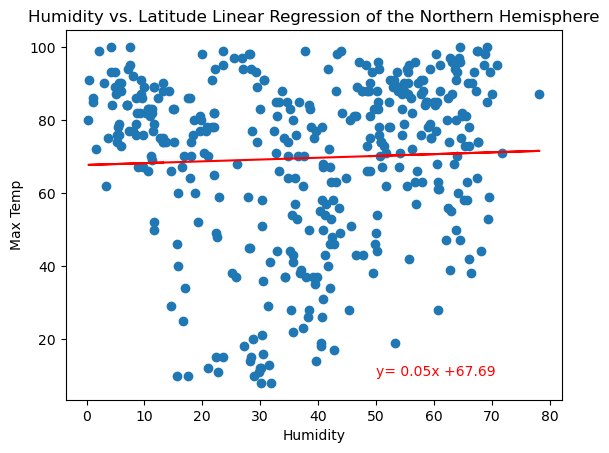

In [21]:
# Northern Hemisphere

x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (50, 10), color = "red")

plt.xlabel('Humidity')
plt.ylabel('Max Temp')
plt.title('Humidity vs. Latitude Linear Regression of the Northern Hemisphere')

print(f'The r-value is: {rvalue**2}')

The r-value is: 0.0038885512612963206


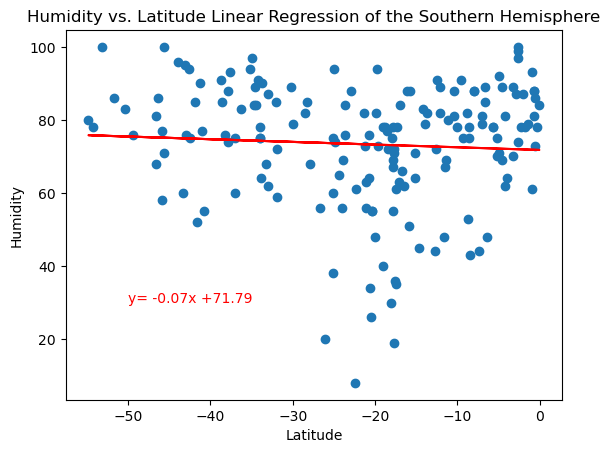

In [22]:
# Southern Hemisphere

x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (-50, 30), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude Linear Regression of the Southern Hemisphere')

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:**
Just by looking at the linear regressions of both data, the plots are scattered so vastily that it is not clear what the relationship between the latitude and the humidity.  In this case, the best value to look at to understand the data is the r-value.  The r-squared value of both linear regression are smaller than 0.5.  A value of 0.5 is typically considered a relatively strong value to indicate a possible correlation between variables.  Since the r-squared value is so much smaller than 0.5, this data can not be used to accurately distinguish the relationship between the distance from the equator and the levels of humidity at a given region.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0015308627329539103


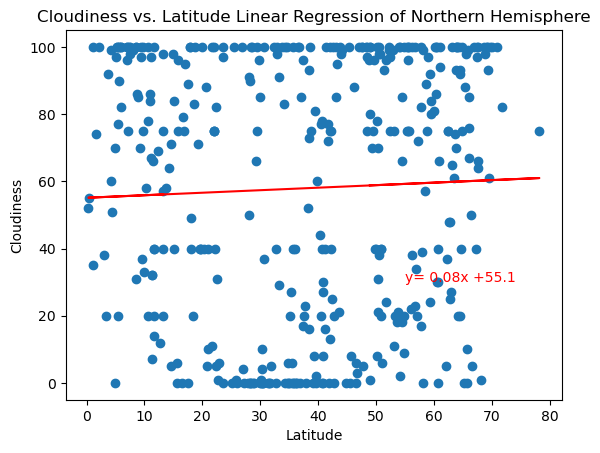

In [23]:
# Northern Hemisphere

x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (55, 30), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude Linear Regression of Northern Hemisphere')

print(f'The r-value is: {rvalue**2}')

The r-value is: 0.005217791032240327


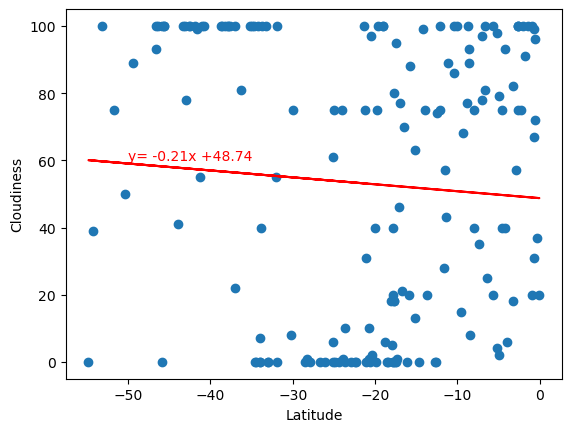

In [24]:
# Southern Hemisphere

x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (-50, 60), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:**
The r-squared value of both linear regression are smaller than 0.5. A value of 0.5 is typically considered a relatively strong value to indicate a possible correlation between variables.  Since the r-squared value is so much smaller than 0.5, this data can not be used to accurately distinguish the relationship between the distance from the equator and the levels of cloudiness at a given region.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014789616434889156


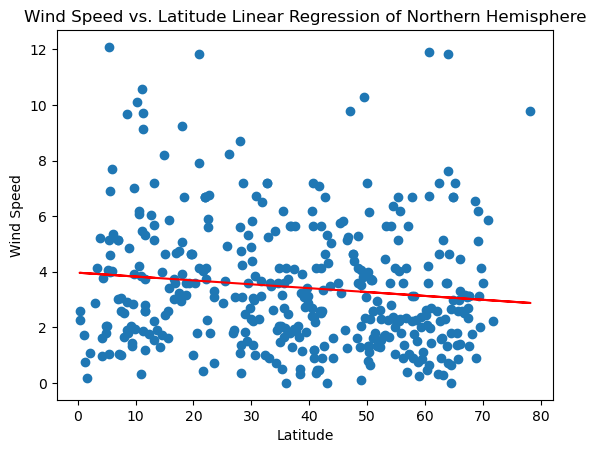

In [25]:
# Northern Hemisphere

x_value = northern_hemisphere_df['Lat']
y_value = northern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (5, 13), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression of Northern Hemisphere')

print(f'The r-value is: {rvalue**2}')

The r-value is: 0.01813237441971538


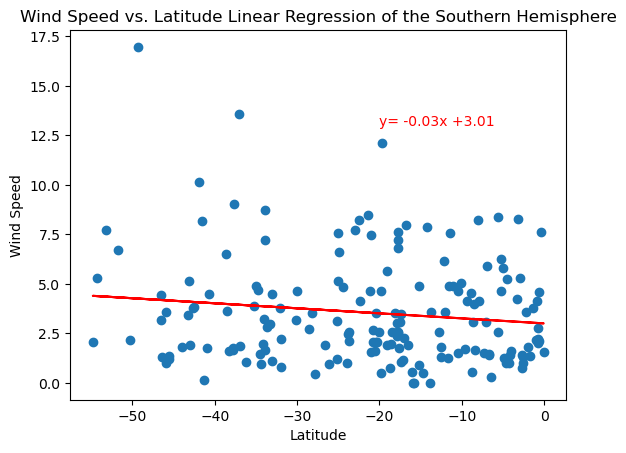

In [26]:
# Southern Hemisphere

x_value = southern_hemisphere_df['Lat']
y_value = southern_hemisphere_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_value = x_value * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_value, "r-")
plt.annotate(line_eq, (-20, 13), color = "red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude Linear Regression of the Southern Hemisphere')

print(f'The r-value is: {rvalue**2}')

**Discussion about the linear relationship:**
The r-squared value of both linear regression are smaller than 0.5. A value of 0.5 is typically considered a relatively strong value to indicate a possible correlation between variables.  Since the r-squared value is so much smaller than 0.5, this data can not be used to accurately distinguish the relationship between the distance from the equator and the wind speed at a given region.